# Face Computer Vision

In [1]:
from deepface import DeepFace
import matplotlib.pyplot as plt
import cv2 #loading imagens


In [2]:
backends= ["opencv", "ssd", "dlib", "mtcnn", "retinaface", "mediapipe"]

In [3]:
face = DeepFace.extract_faces (
    img_path = "face-db/Cesar/Cesar_01.jpg",
    target_size = (224, 224),
    detector_backend =  backends[1]
)

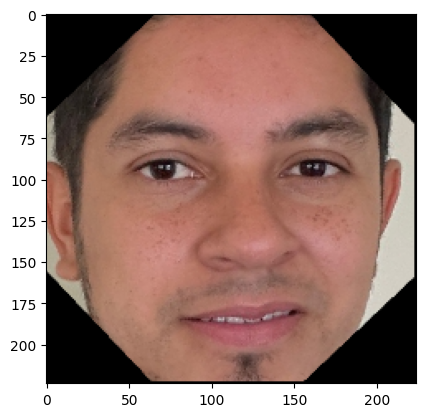

In [4]:
plt.imshow(face[0]['face'])

1/1 [==============================] - 0s 128ms/step


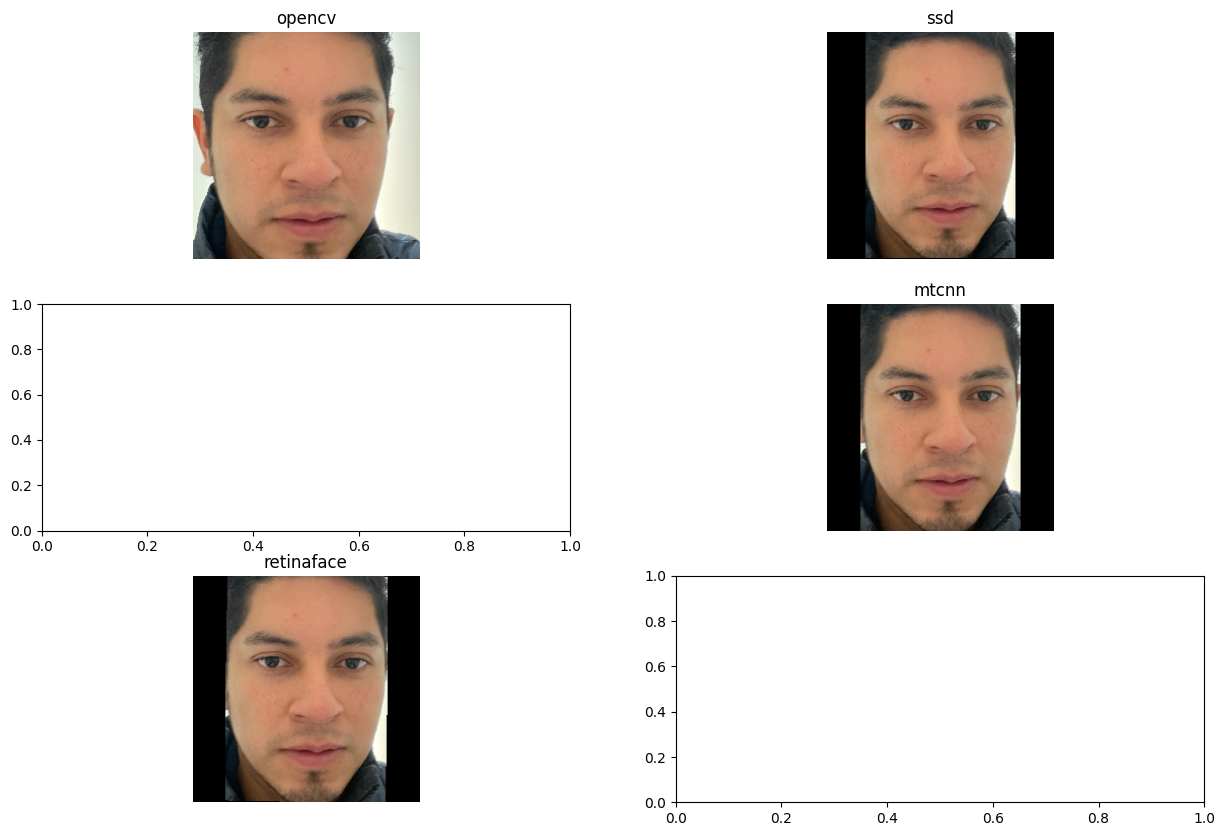

In [5]:
fig, axs = plt.subplots(3,2, figsize= (15, 10))
axs= axs.flatten()

for i, b in enumerate(backends):
    try:
        face = DeepFace.extract_faces (
            img_path = "face-db/Cesar/Cesar_02.jpg",
            target_size = (224, 224),
            detector_backend =  b
        )
        axs[i].imshow(face[0]['face'])
        axs[i].set_title(b)
        axs[i].axis('off')
    except:
        pass

1/1 [==============================] - 0s 25ms/step


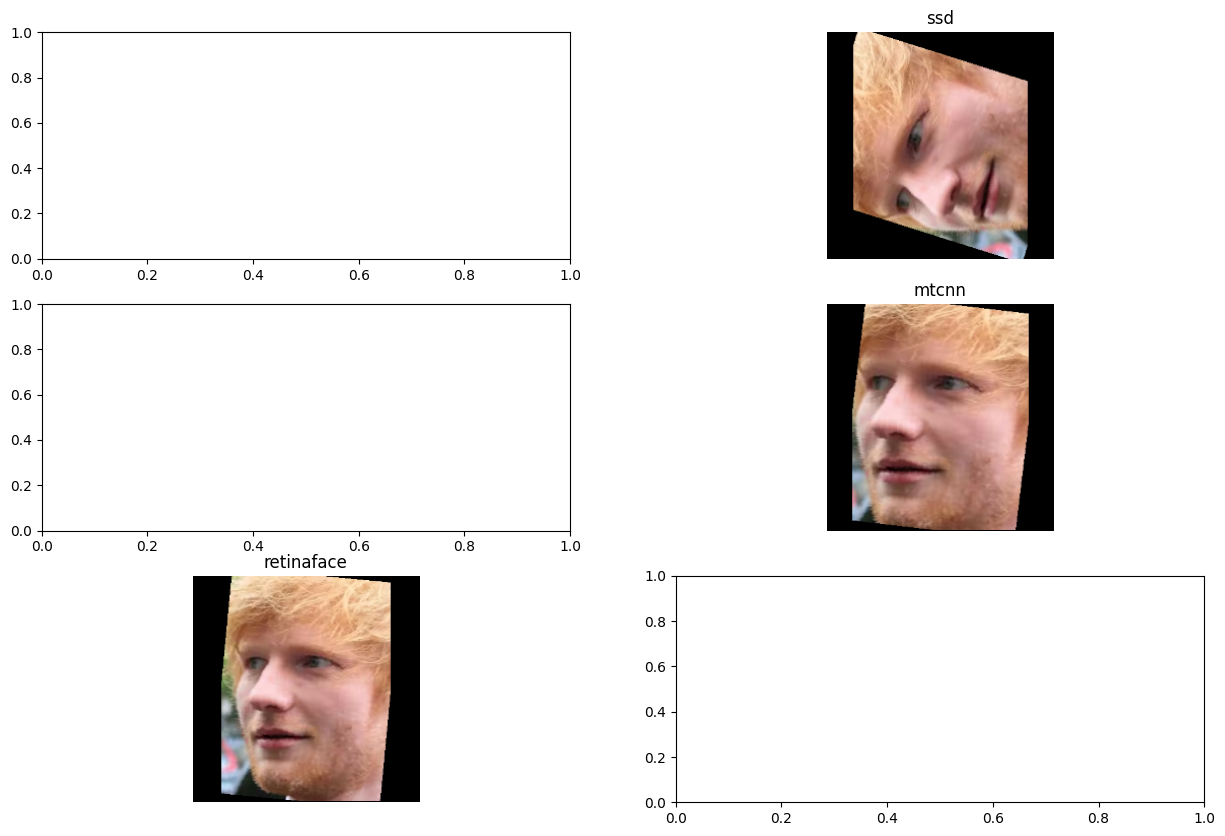

In [6]:
fig, axs = plt.subplots(3,2, figsize= (15, 10))
axs= axs.flatten()

for i, b in enumerate(backends):
    try:
        face = DeepFace.extract_faces (
            img_path = "face-db/Ed/Ed_Sheeran_03.jpg",
            target_size = (224, 224),
            detector_backend =  b
        )
        axs[i].imshow(face[0]['face'])
        axs[i].set_title(b)
        axs[i].axis('off')
    except:
        pass

In [7]:
models= ["VGG-Face", "Facenet", "Facenet512", "OpenFace", "DeepFace", 
            "DeepID", "ArcFace", "Dlib", "SFace"]

img1= "face-db/Cesar/Cesar_02.jpg"
img2= "face-db/Cesar/Cesar_04.jpg"

verification = DeepFace.verify(
    img1_path= img1, 
    img2_path= img2,
    model_name= models[6]
)

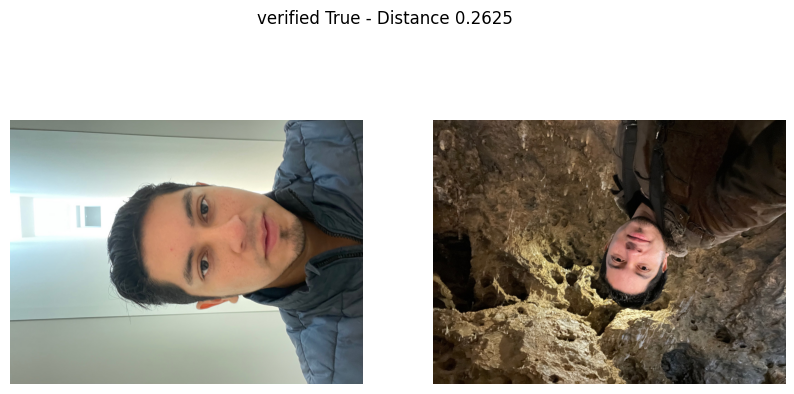

In [8]:
fig, axs = plt.subplots(1, 2, figsize= (10, 5))
axs[0].imshow(plt.imread(img1))
axs[1].imshow(plt.imread(img2))
fig.suptitle(f"verified {verification['verified']} - Distance {verification['distance']:0.4}")
axs[0].axis('off')
axs[1].axis('off')
plt.show()

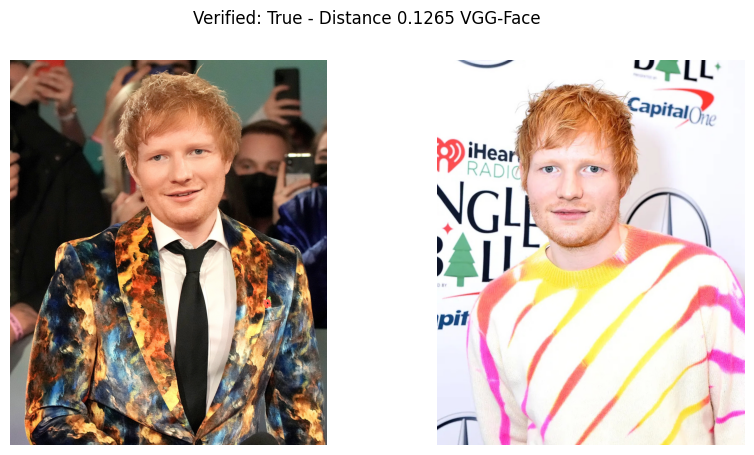

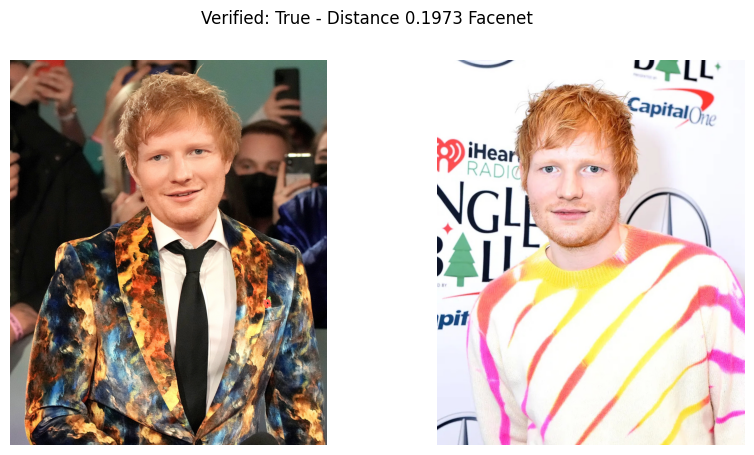

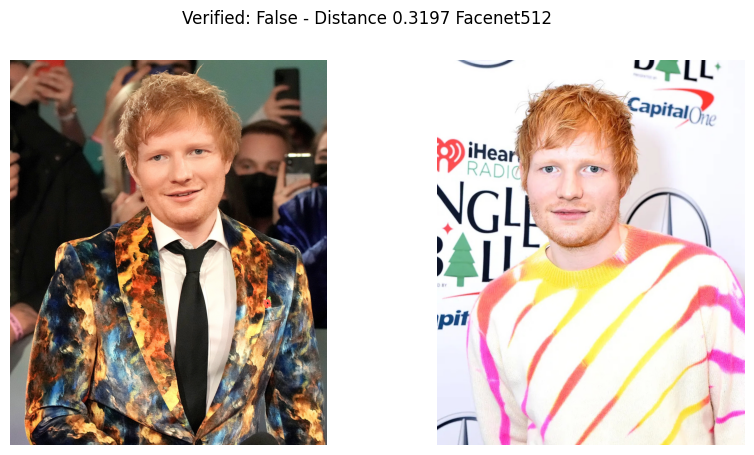

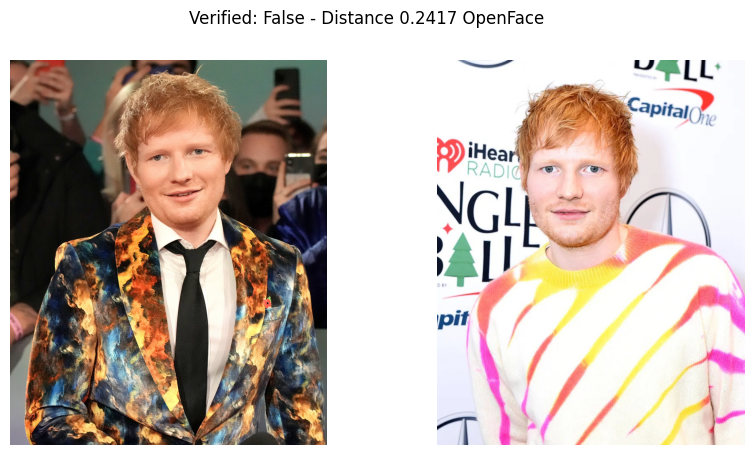

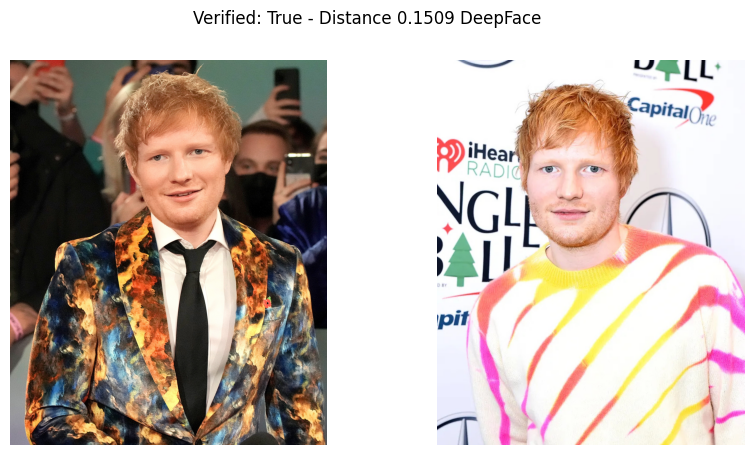

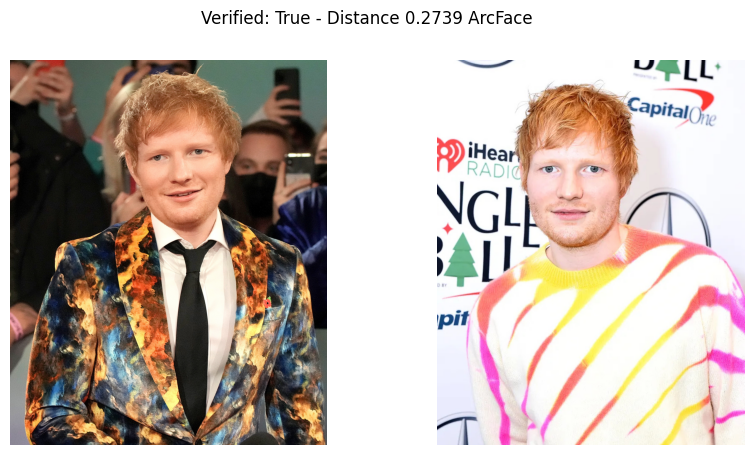

In [9]:
img1= "face-db/Ed/Ed_Sheeran_01.jpg"
img2= "face-db/Ed/Ed_Sheeran_08.jpg"

for model in models:
    try:
        verification = DeepFace.verify(
            img1_path= img1, 
            img2_path= img2,
            model_name= model
        )

        fig, axs = plt.subplots(1, 2, figsize= (10, 5))
        axs[0].imshow(plt.imread(img1))
        axs[1].imshow(plt.imread(img2))
        fig.suptitle(f"Verified: {verification['verified']} - Distance {verification['distance']:0.4} {model}")
        axs[0].axis('off')
        axs[1].axis('off')
        plt.show()
    except:
        pass

# Face Recognition

In [10]:
find= DeepFace.find(
    img_path="face-db/Ed/Ed_Sheeran_10.jpg", 
    db_path="face-db/",
    enforce_detection= False
)

There are  28  representations found in  representations_vgg_face.pkl
find function lasts  2.694307804107666  seconds


In [11]:
find

[                       identity  source_x  source_y  source_w  source_h  \
 0  face-db/Ed/Ed_Sheeran_10.jpg       182        87       218       218   
 1  face-db/Ed/Ed_Sheeran_08.jpg       182        87       218       218   
 2  face-db/Ed/Ed_Sheeran_01.jpg       182        87       218       218   
 3  face-db/Ed/Ed_Sheeran_09.jpg       182        87       218       218   
 4  face-db/Ed/Ed_Sheeran_11.jpg       182        87       218       218   
 5  face-db/Ed/Ed_Sheeran_07.jpg       182        87       218       218   
 6  face-db/Ed/Ed_Sheeran_05.jpg       182        87       218       218   
 7  face-db/Ed/Ed_Sheeran_04.jpg       182        87       218       218   
 
    VGG-Face_cosine  
 0     4.440892e-16  
 1     1.800879e-01  
 2     1.858296e-01  
 3     1.934864e-01  
 4     2.478742e-01  
 5     2.550647e-01  
 6     2.556796e-01  
 7     3.852770e-01  ]

# Facial Attributes Analysis

In [12]:
attribute = DeepFace.analyze(img_path="face-db/Ed/Ed_Sheeran_10.jpg")

Action: race: 100%|██████████| 4/4 [00:06<00:00,  1.65s/it]   


In [13]:
attribute

[{'emotion': {'angry': 0.0004543452178040752,
   'disgust': 8.496395254020683e-09,
   'fear': 84.85620021820068,
   'happy': 14.720077812671661,
   'sad': 0.05409445147961378,
   'surprise': 0.17205935437232256,
   'neutral': 0.19711526110768318},
  'dominant_emotion': 'fear',
  'region': {'x': 182, 'y': 87, 'w': 218, 'h': 218},
  'age': 48,
  'gender': {'Woman': 0.054964731680229306, 'Man': 99.94503855705261},
  'dominant_gender': 'Man',
  'race': {'asian': 1.7586403253805338e-10,
   'indian': 1.6986906672955548e-10,
   'black': 5.693496596998902e-14,
   'white': 99.99985694885254,
   'middle eastern': 0.00011434693760747905,
   'latino hispanic': 3.062705786760489e-05},
  'dominant_race': 'white'}]

<Axes: >

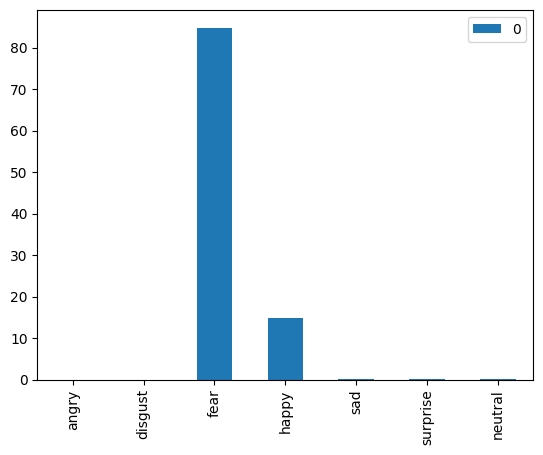

In [14]:
import pandas as pd

pd.DataFrame(attribute[0]['emotion'], index= [0]).T.plot(kind= 'bar')

In [15]:
from glob import glob

In [18]:
def plot_emotion(img, emotion, figsize= (15,5)):
    img= cv2.cvtColor(img, cv2.COLOR_BGR2RGBA)
    fig, axs= plt.subplots(1, 2, figsize= figsize)
    axs[0].axis('off')
    axs[0].imshow(img)
    emotion.sort_values('prediction').plot(kind= 'barh', figsize= figsize, ax= axs[1])
    plt.tight_layout()
    plt.show()

Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.27it/s]   


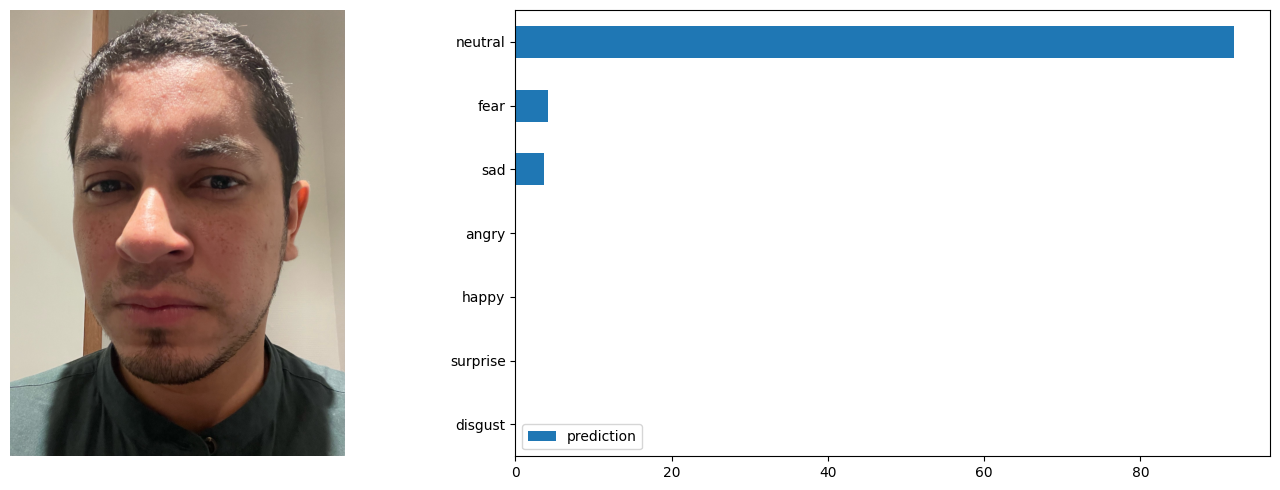

Action: race: 100%|██████████| 4/4 [00:00<00:00,  4.14it/s]  


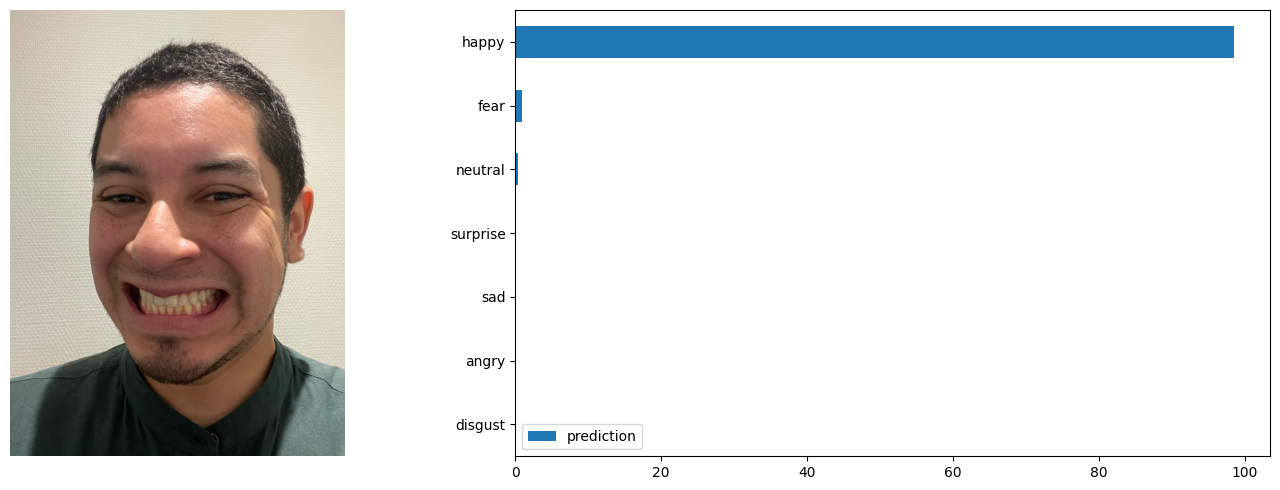

Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.58it/s]  


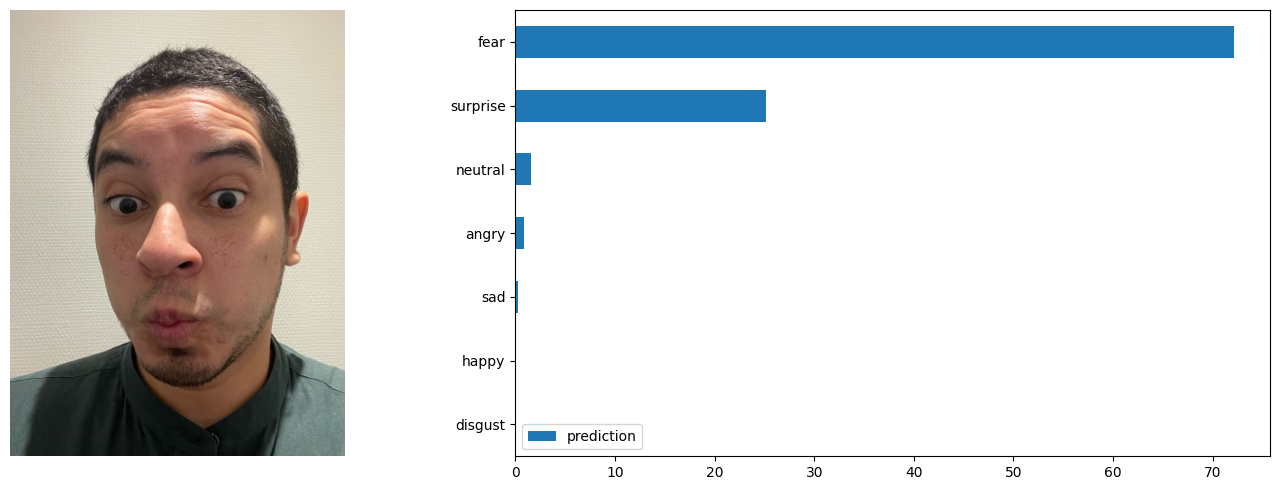

Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.96it/s]  


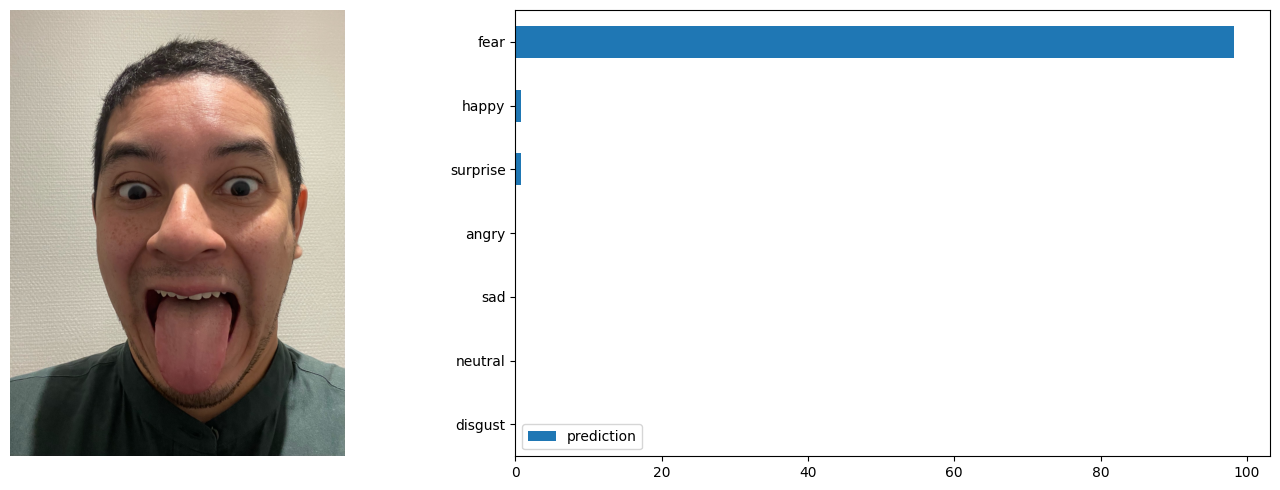

Action: race: 100%|██████████| 4/4 [00:00<00:00,  4.53it/s]  


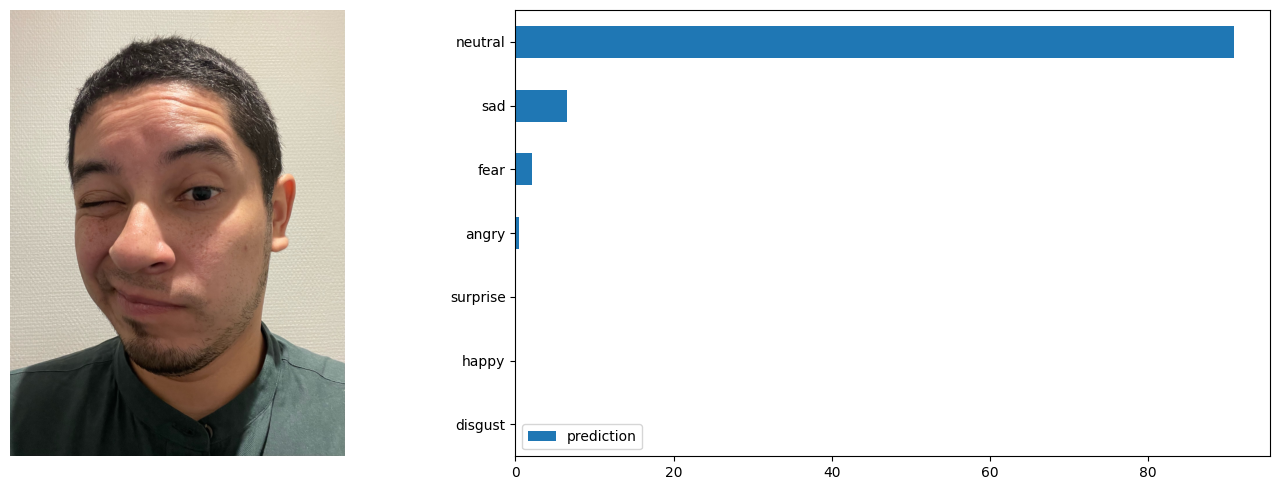

Action: race: 100%|██████████| 4/4 [00:00<00:00,  4.24it/s]   


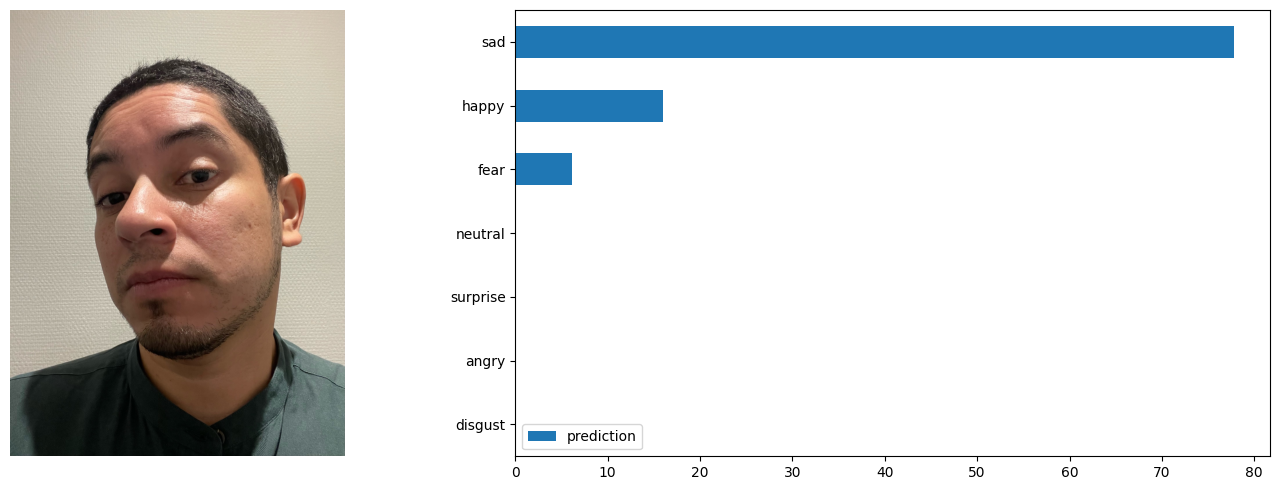

Action: race: 100%|██████████| 4/4 [00:00<00:00,  4.01it/s]  


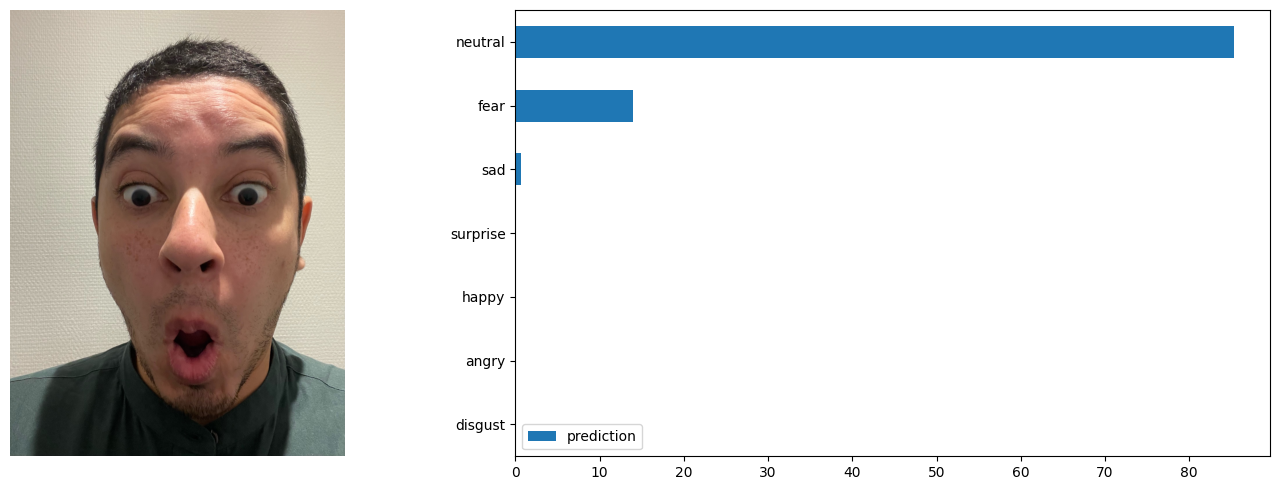

Action: race: 100%|██████████| 4/4 [00:00<00:00,  4.75it/s]  


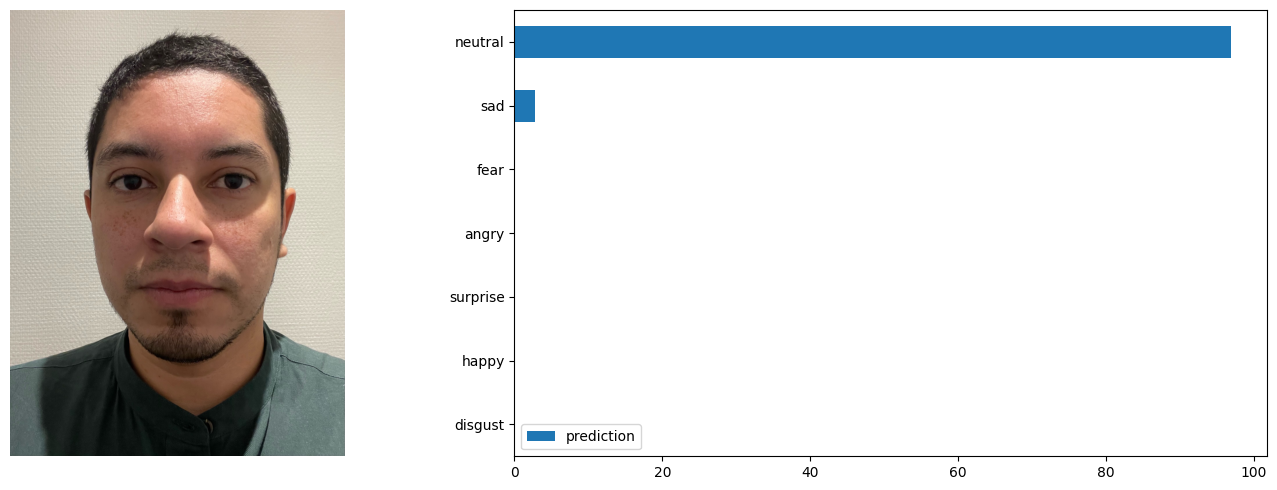

Action: race: 100%|██████████| 4/4 [00:00<00:00,  4.58it/s]  


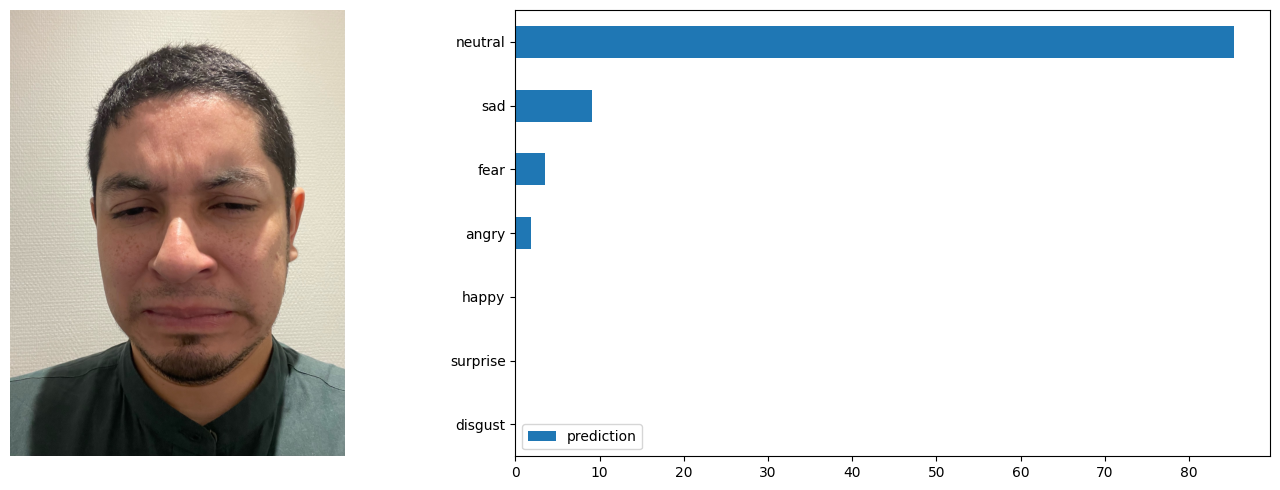

Action: race: 100%|██████████| 4/4 [00:00<00:00,  4.74it/s]  


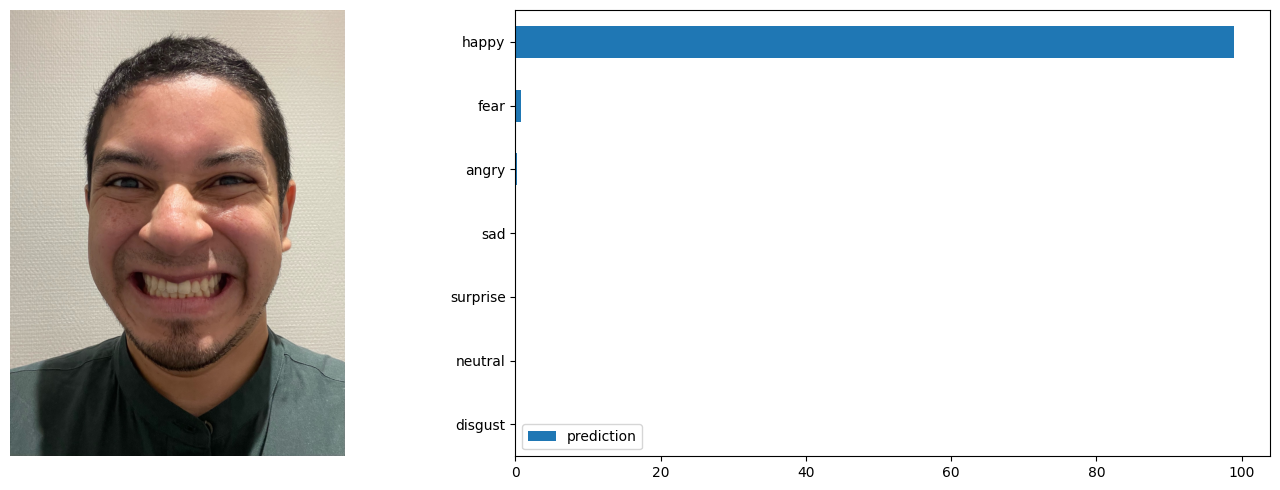

In [19]:
imgs_emotion= glob("test_emotions/*")

for img in imgs_emotion:
    img= cv2.imread(img)
    analyze= DeepFace.analyze(
        img_path=img,
        enforce_detection= False
    )
    df_emotion= pd.DataFrame(
        analyze[0]['emotion'],
        index= [0]
    ).T.rename(
        columns={0: "prediction"}
    )
    plot_emotion(img, df_emotion)    

# Streaming API

In [20]:
DeepFace.stream(
    db_path="face-db/", 
    detector_backend= backends[4], 
    source= 0,
    time_threshold= 5
)

facial recognition model VGG-Face is just built
Age model is just built
Gender model is just built
Emotion model is just built


Finding representations: 100%|██████████| 21/21 [01:22<00:00,  3.92s/it]


Representations stored in face-db//representations_vgg_face.pkl file.Please delete this file when you add new identities in your database.
find function lasts  86.64060568809509  seconds


KeyboardInterrupt: 